In [1]:
## Set-up.
### Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
DATA_PATH = '../dataset/'

In [9]:
data = pd.read_parquet(os.path.join(DATA_PATH,'data_eng.gzip'))

In [19]:
data.to_csv('data.csv')

In [6]:
data

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,occupation_code_main,household_summary,vet_benefit,tax_status,citizenship,income_above_limit,investments
0,63+,Female,highschool,NA,Widowed,White,No,Unemployed,0,0_10,weeks_worked_48_52,Not in universe or children,NA,Householder,2,Head of household,Native,0,True
1,63+,Female,highschool,NA,Widowed,White,No,Children or Armed Forces,0,0_10,weeks_worked_0,Not in universe or children,NA,Householder,2,Single,Native,0,False
2,18_24,Male,no_highschool,Federal government,Never married,Black,No,Children or Armed Forces,0,101_500,weeks_worked_1_25,Hospital services,Adm support including clerical,Child 18 or older,2,Single,Native,0,False
4,63+,Male,highschool,NA,Married-civilian spouse present,White,No,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Spouse of householder,2,Joint both 65+,Native,0,False
5,33_45,Male,bachelors,Private,Married-civilian spouse present,Asian or Pacific Islander,No,Children or Armed Forces,0,501_1000,weeks_worked_48_52,Retail trade,Other service,Householder,2,Joint both under 65,Foreign born- Not a citizen of U S,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209492,33_45,Female,no_highschool,NA,Married-civilian spouse present,White,Yes,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Spouse of householder,2,Joint both under 65,Foreign born- Not a citizen of U S,0,False
209493,25_32,Male,assc_voc,State government,Never married,White,No,Full-time schedules,0,0_10,weeks_worked_26_47,Public administration,Other service,Child 18 or older,2,Single,Native,0,True
209495,63+,Male,bachelors,NA,Married-civilian spouse present,White,No,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Householder,2,Joint both 65+,Native,0,True
209497,25_32,Female,somecollege,Private,Married-civilian spouse present,White,No,Children or Armed Forces,0,501_1000,weeks_worked_48_52,Wholesale trade,Handlers equip cleaners etc,Spouse of householder,2,Joint both under 65,Native,0,False


In [77]:
pd.pivot_table(d2, values = ['cnt'], index=['education'],
                       columns=['labels'], aggfunc="sum").apply(lambda x: x*100/sum(x))

cnt                                 
labels                 0          1          2          3
education                                                
assc_acad       3.899563   3.026202   3.678806   1.804118
assc_voc        4.609816   4.047238   4.663350   2.316269
bachelors      15.853214  16.498954  18.563413   8.008936
doctorate       2.030596   3.166441   2.858353   0.950534
highschool     36.762429  34.503629  29.075799  31.363416
masters         5.413404   5.405339   6.050180   2.409004
no_highschool  10.553633  14.360930   9.623121  37.155142
somecollege    20.877345  18.991266  25.486979  15.992581

In [78]:
pd.pivot_table(d2, values = ['cnt'], index=['employment_commitment'],
                       columns=['labels'], aggfunc="sum").apply(lambda x: x*100/sum(x))

cnt                                 
labels                             0          1          2          3
employment_commitment                                                
 Children or Armed Forces  38.264888  65.862960  49.311878  48.055725
 Full-time schedules       53.448825  26.089310  39.831675   0.434169
Part-time employed          5.677472   5.247878   5.928435   0.322465
Unemployed                  2.608814   2.799852   4.928012  51.187641

In [79]:
pd.pivot_table(d2, values = ['cnt'], index=['investments'],
                       columns=['labels'], aggfunc="sum").apply(lambda x: x*100/sum(x))

cnt                                 
labels               0          1          2          3
investments                                            
False        80.836824  74.540534  79.345755  83.640694
True         19.163176  25.459466  20.654245  16.359306

In [80]:
pd.pivot_table(d2, values = ['cnt'], index=['wage_per_hour'],
                       columns=['labels'], aggfunc="sum").apply(lambda x: x*100/sum(x))

cnt                   
labels                 0          1   2   3
wage_per_hour                              
0_10           88.483427  89.924960 NaN NaN
1000+           3.159716   4.837003 NaN NaN
101_500         2.035148   1.045639 NaN NaN
501_1000        6.308050   4.180096 NaN NaN
51-100          0.013659   0.012302 NaN NaN

## Kmodes

In [10]:
from kmodes.kmodes import KModes

In [11]:
dt = data.drop('income_above_limit', axis=1)

In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150912 entries, 0 to 209498
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    150912 non-null  object
 1   gender                 150912 non-null  object
 2   education              150912 non-null  object
 3   class                  150912 non-null  object
 4   marital_status         150912 non-null  object
 5   race                   150912 non-null  object
 6   is_hispanic            150912 non-null  object
 7   employment_commitment  150912 non-null  object
 8   employment_stat        150912 non-null  object
 9   wage_per_hour          150912 non-null  object
 10  working_week_per_year  150912 non-null  object
 11  industry_code_main     150912 non-null  object
 12  occupation_code_main   150912 non-null  object
 13  household_summary      150912 non-null  object
 14  vet_benefit            150912 non-null  object
 15  

In [10]:
cost = []
for cluster in range(1,8):
    print('{cluster}\\.cluster start'.format(cluster=cluster))
    kproto = KModes(n_clusters = cluster, init='Huang',n_jobs=-1,n_init=10,verbose=1)
    kproto.fit(dt)
    cost.append(kproto.cost_)

1\.cluster start
Best run was number 1
2\.cluster start


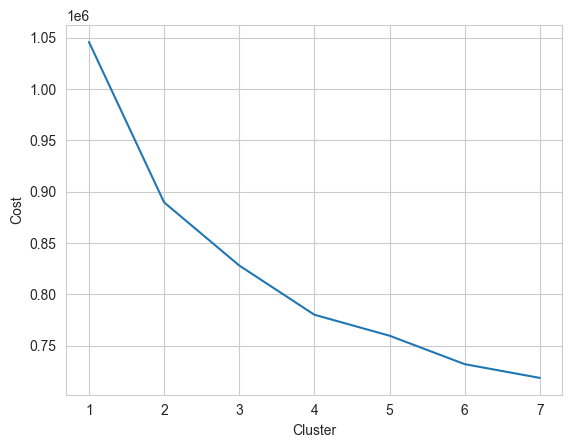

In [22]:
plt.plot(range(1,len(cost)+1),cost)
plt.xlabel('Cluster')
plt.ylabel('Cost')
plt.show()

In [13]:
kproto4 = KModes(n_clusters = 4, init='Huang',n_jobs=-1,n_init=10,verbose=1)
kproto4.fit(dt)

Best run was number 3


KModes(init='Huang', n_clusters=4, n_jobs=-1, verbose=1)

In [18]:
data.head()

,age,gender,education,class,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,industry_code_main,occupation_code_main,household_summary,vet_benefit,tax_status,citizenship,income_above_limit,investments,4_clusters
0,63+,Female,highschool,NA,Widowed,White,No,Unemployed,0,0_10,weeks_worked_48_52,Not in universe or children,NA,Householder,2,Head of household,Native,0,True,0
1,63+,Female,highschool,NA,Widowed,White,No,Children or Armed Forces,0,0_10,weeks_worked_0,Not in universe or children,NA,Householder,2,Single,Native,0,False,0
2,18_24,Male,no_highschool,Federal government,Never married,Black,No,Children or Armed Forces,0,101_500,weeks_worked_1_25,Hospital services,Adm support including clerical,Child 18 or older,2,Single,Native,0,False,2
4,63+,Male,highschool,NA,Married-civilian spouse present,White,No,Unemployed,0,0_10,weeks_worked_0,Not in universe or children,NA,Spouse of householder,2,Joint both 65+,Native,0,False,0
5,33_45,Male,bachelors,Private,Married-civilian spouse present,Asian or Pacific Islander,No,Children or Armed Forces,0,501_1000,weeks_worked_48_52,Retail trade,Other service,Householder,2,Joint both under 65,Foreign born- Not a citizen of U S,0,False,3


In [21]:
data['4_clusters']=kproto4.labels_
data['cnt'] = 1

In [ ]:
#data['6_clusters']=kproto6.labels_

In [39]:
data.groupby('4_clusters')['income_above_limit'].mean()

4_clusters
0    0.018345
1    0.073553
2    0.058820
3    0.219898
Name: income_above_limit, dtype: float64

In [60]:
data.groupby('4_clusters')['cnt'].sum()

4_clusters
0    50694
1    33595
2    31384
3    35239
Name: cnt, dtype: int64

In [34]:
cols = data.columns
cols = cols[:-2]

In [32]:
cols

Index(['age', 'gender', 'education', 'class', 'marital_status', 'race',
       'is_hispanic', 'employment_commitment', 'employment_stat',
       'wage_per_hour', 'working_week_per_year', 'industry_code_main',
       'occupation_code_main', 'household_summary', 'vet_benefit',
       'tax_status', 'citizenship', 'income_above_limit', 'investments',
       '4_clusters', 'cnt'],
      dtype='object')

In [52]:
pivot_tables = {}

In [53]:
for col in cols:
    pivot = pd.pivot_table(data, values = ['cnt'], index=col, columns=['4_clusters'], aggfunc="sum").apply(lambda x: x*100/sum(x))
    pivot_tables[col] = pivot 

In [54]:
pivot_tables[cols[0]]

cnt                                 
4_clusters          0          1          2          3
age                                                   
18_24       10.190555   4.598899  35.578639   2.851954
25_32        9.314712  18.699211  26.962784  16.246204
33_45       12.900935  47.027832  15.170150  45.401402
46_62       18.023829  27.027832  18.678307  31.050824
63+         49.569969   2.646227   3.610120   4.449615

In [55]:
pivot_tables[cols[1]]

cnt                                 
4_clusters          0          1          2          3
gender                                                
 Female     65.421943  88.724513  52.839026   1.106728
 Male       34.578057  11.275487  47.160974  98.893272

In [56]:
pivot_tables[cols[2]]

cnt                                 
4_clusters             0          1          2          3
education                                                
assc_acad       1.820728   4.423277   3.253250   3.019382
assc_voc        2.329664   5.387707   3.559138   4.375834
bachelors       8.146921  17.395446  16.135611  16.853486
doctorate       0.994200   2.149129   1.660082   4.038140
highschool     31.741429  36.478643  32.363625  34.178041
masters         2.542707   6.090192   4.362095   6.121059
no_highschool  36.250838   8.516148  13.216926  12.866426
somecollege    16.173512  19.559458  25.449274  18.547632

In [57]:
pivot_tables[cols[3]]

cnt                                 
4_clusters                               0          1          2          3
class                                                                      
 Federal government               0.124275   3.062956   2.717945   3.093164
 Local government                 0.733815  10.912338   5.929773   5.964982
 Never worked                     0.368880   0.005953   0.009559   0.002838
 Private                          1.909496  68.200625  79.779505  69.440109
 Self-employed-incorporated       0.147947   3.021283   1.577237   5.161894
 Self-employed-not incorporated   1.112558   8.471499   4.585139  11.288629
 State government                 0.293920   4.920375   4.288810   3.720310
 Without pay                      0.029589   0.258967   0.092404   0.042566
NA                               95.279520   1.146004   1.019628   1.285508

In [58]:
pivot_tables[cols[4]]

cnt                                 
4_clusters                                0          1          2          3
marital_status                                                              
 Divorced                          7.150748   5.846108  16.897145   7.230625
 Married-A F spouse present        0.483292   1.300789   0.038236   0.065269
 Married-civilian spouse present  54.166174  90.043161   0.006373  86.954794
 Married-spouse absent             1.165818   0.452448   1.749299   0.763359
 Never married                    16.309622   0.297663  72.893831   2.823576
 Separated                         2.599913   1.625242   3.632424   1.623202
 Widowed                          18.124433   0.434588   4.782692   0.539175

In [59]:
pivot_tables[cols[5]]

cnt                                 
4_clusters                            0          1          2          3
race                                                                    
 Amer Indian Aleut or Eskimo   1.055352   0.872154   1.083355   0.899571
 Asian or Pacific Islander     2.763641   3.113559   2.749809   2.701552
 Black                        10.567326   7.402887  12.541422   6.075655
 Other                         1.485383   1.390088   1.816212   1.464287
 White                        84.128299  87.221313  81.809202  88.858935

In [61]:
pivot_tables[cols[6]]

cnt                                
4_clusters          0          1         2          3
is_hispanic                                          
No           86.73413  89.233517  86.49949  87.828826
Yes          13.26587  10.766483  13.50051  12.171174

In [62]:
pivot_tables[cols[7]]

cnt                                 
4_clusters                         0          1          2          3
employment_commitment                                                
 Children or Armed Forces  50.428059  49.221610  49.776956  51.005988
 Full-time schedules        1.252614  41.532966  40.160591  41.493799
Part-time employed          0.357044   6.349159   5.843742   4.971764
Unemployed                 47.962284   2.896264   4.218710   2.528449

In [63]:
pivot_tables[cols[8]]

cnt                                 
4_clusters               0          1          2          3
employment_stat                                            
0                98.112203  84.634618  76.937293  82.831522
1                 0.230797   2.387260   2.227250   3.445047
2                 1.657001  12.978122  20.835458  13.723431

In [64]:
pivot_tables[cols[9]]

cnt                                 
4_clusters      0          1          2          3
wage_per_hour                                     
0_10          NaN  88.816788  86.792633  90.365788
1000+         NaN   3.464801   2.619169   5.499589
101_500       NaN   1.592499   3.310604   0.533500
501_1000      NaN   6.116982   7.258476   3.595448
51-100        NaN   0.008930   0.019118   0.005676

In [65]:
pivot_tables[cols[10]]

cnt                                 
4_clusters                     0          1          2          3
working_week_per_year                                            
weeks_worked_0         84.941019   2.839708   2.584119   1.384829
weeks_worked_1_25       8.628240   7.224289  11.413459   3.697608
weeks_worked_26_47      3.860417  14.139009  15.785113   9.517864
weeks_worked_48_52      2.570324  75.796994  70.217308  85.399699

In [66]:
pivot_tables[cols[11]]

cnt                        \
4_clusters                                    0          1          2   
industry_code_main                                                      
 Agriculture                           0.477374   1.967555   2.421616   
 Armed Forces                          0.007890   0.020836   0.022304   
 Business and repair services          0.311674   4.607829   6.375860   
 Communications                        0.013808   1.154934   1.182131   
 Construction                          0.205152   1.794910   4.253760   
 Education                             0.690417  12.853103   7.698190   
 Entertainment                         0.098631   1.324602   2.370635   
 Finance insurance and real estate     0.153864   7.992261   6.283457   
 Forestry and fisheries                0.015781   0.125019   0.175249   
 Hospital services                     0.094686   6.530734   3.973362   
 Manufacturing-durable goods           0.120330   4.092871   5.177798   
 Manufacturing-nondurable goods        0.250523   6.375949   6.458705   
 Medical except hospital               0.183454   7.861289   4.868723   
 Mining                                0.007890   0.264920   0.277211   
 Not in universe or children          95.648400   1.151957   1.029187   
 Other professional services           0.159782   4.973954   4.148611   
 Personal services except private HH   0.250523   3.607680   3.514530   
 Private household services            0.155837   1.062658   1.335075   
 Public administration                 0.230797   4.456020   4.033903   
 Retail trade                          0.357044  16.981694  24.044099   
 Social services                       0.309701   3.976782   2.788045   
 Transportation                        0.134138   3.223694   3.737573   
 Utilities and sanitary services       0.021699   0.735228   0.627708   
 Wholesale trade                       0.100604   2.863521   3.202269   

                                                 
4_clusters                                    3  
industry_code_main                               
 Agriculture                           3.774227  
 Armed Forces                          0.039729  
 Business and repair services          6.265785  
 Communications                        1.381992  
 Construction                         12.227929  
 Education                             4.432589  
 Entertainment                         1.140782  
 Finance insurance and real estate     4.460967  
 Forestry and fisheries                0.266750  
 Hospital services                     1.688470  
 Manufacturing-durable goods          17.724680  
 Manufacturing-nondurable goods        8.138710  
 Medical except hospital               1.779279  
 Mining                                1.296859  
 Not in universe or children           1.288345  
 Other professional services           4.341780  
 Personal services except private HH   1.574960  
 Private household services            0.085133  
 Public administration                 5.125004  
 Retail trade                          9.103550  
 Social services                       0.652686  
 Transportation                        5.908227  
 Utilities and sanitary services       2.207781  
 Wholesale trade                       5.093788

In [67]:
pivot_tables[cols[12]]

cnt                        \
4_clusters                                      0          1          2   
occupation_code_main                                                      
 Adm support including clerical          0.220933  24.872749  17.101071   
 Armed Forces                            0.007890   0.020836   0.022304   
 Executive admin and managerial          0.327455  13.513916   9.820291   
 Farming forestry and fishing            0.524717   1.660961   2.663778   
 Handlers equip cleaners etc             0.254468   1.875279   6.069972   
 Machine operators assmblrs & inspctrs   0.329428   4.920375   6.162376   
 Other service                           1.118476  13.811579  16.654983   
 Precision production craft & repair     0.185426   1.881232   5.455009   
 Private household services              0.138083   0.943593   1.108845   
 Professional specialty                  0.615457  17.651436  12.219602   
 Protective services                     0.108494   0.696532   1.577237   
 Sales                                   0.297866  11.644590  13.822330   
 Technicians and related support         0.057206   3.482661   3.144915   
 Transportation and material moving      0.165700   1.872302   3.148101   
NA                                      95.648400   1.151957   1.029187   

                                                   
4_clusters                                      3  
occupation_code_main                               
 Adm support including clerical          3.779903  
 Armed Forces                            0.039729  
 Executive admin and managerial         15.060019  
 Farming forestry and fishing            4.066517  
 Handlers equip cleaners etc             3.867874  
 Machine operators assmblrs & inspctrs   8.118846  
 Other service                           4.199892  
 Precision production craft & repair    24.742473  
 Private household services              0.034053  
 Professional specialty                 12.491841  
 Protective services                     2.559664  
 Sales                                   9.929340  
 Technicians and related support         2.667499  
 Transportation and material moving      7.154006  
NA                                       1.288345

In [68]:
pivot_tables[cols[13]]

cnt                   
4_clusters                                     0   1   2          3
household_summary                                                  
 Child 18 or older                      8.689391 NaN NaN   1.765090
 Group Quarters- Secondary individual   0.130193 NaN NaN   0.008513
 Householder                           51.660946 NaN NaN  91.242657
 Nonrelative of householder             2.844518 NaN NaN   1.750901
 Other relative of householder          5.716653 NaN NaN   1.651579
 Spouse of householder                 30.958299 NaN NaN   3.581259

In [69]:
pivot_tables[cols[14]]

cnt                                 
4_clusters          0          1          2          3
vet_benefit                                           
1             2.54468   0.241107   0.551236   1.518204
2            97.45532  99.758893  99.448764  98.481796

In [70]:
pivot_tables[cols[15]]

cnt                          
4_clusters                             0          1   2          3
tax_status                                                        
 Head of household              2.161992   6.777794 NaN   3.541531
 Joint both 65+                15.297668   1.431761 NaN   1.574960
 Joint both under 65           23.703002  86.873047 NaN  83.311104
 Joint one under 65 & one 65+   5.144593   2.661110 NaN   1.714010
 Nonfiler                      38.947410   0.735228 NaN   1.197537
 Single                        14.745335   1.521060 NaN   8.660859

In [71]:
pivot_tables[cols[16]]

cnt                        \
4_clusters                                            0          1          2   
citizenship                                                                     
 Foreign born- Not a citizen of U S            8.817612   6.676589   8.166582   
 Foreign born- U S citizen by naturalization   4.592259   4.116684   2.571374   
 Native- Born abroad of American Parent(s)     0.824555   0.949546   1.213994   
 Native- Born in Puerto Rico or U S Outlying   1.325601   0.654859   0.767907   
Native                                        84.439973  87.602322  87.280143   

                                                         
4_clusters                                            3  
citizenship                                              
 Foreign born- Not a citizen of U S            7.803854  
 Foreign born- U S citizen by naturalization   4.140299  
 Native- Born abroad of American Parent(s)     1.047135  
 Native- Born in Puerto Rico or U S Outlying   0.644173  
Native                                        86.364539

In [72]:
pivot_tables[cols[17]]

cnt                                 
4_clusters                  0          1          2          3
income_above_limit                                            
0                   98.165463  92.644739  94.118022  78.010159
1                    1.834537   7.355261   5.881978  21.989841

In [74]:
pivot_tables[cols[18]]

cnt                                
4_clusters           0          1          2         3
investments                                           
False        83.343196  81.107308  83.956793  69.90834
True         16.656804  18.892692  16.043207  30.09166